In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [15]:
#path = './training(Data).csv'
path = '../Data/raw/training.xlsx'

#df = pd.read_csv(path)
df = pd.read_excel(path, header=0)

df.head()



,Year,Month,Day,Hour,Load,Site-1 Temp,Site-2 Temp,Site-3 Temp,Site-4 Temp,Site-5 Temp,Site-1 GHI,Site-2 GHI,Site-3 GHI,Site-4 GHI,Site-5 GHI
0,1,1,1,1,1997,8.0,8.2,5.3,9.4,8.1,0,0,0,0,0
1,1,1,1,2,1921,8.3,8.6,5.2,8.6,7.1,0,0,0,0,0
2,1,1,1,3,1861,8.1,8.8,5.1,8.7,6.2,0,0,0,0,0
3,1,1,1,4,1833,7.6,8.1,4.3,8.5,6.0,0,0,0,0,0
4,1,1,1,5,1847,7.3,7.5,4.0,8.6,6.9,0,0,0,0,0


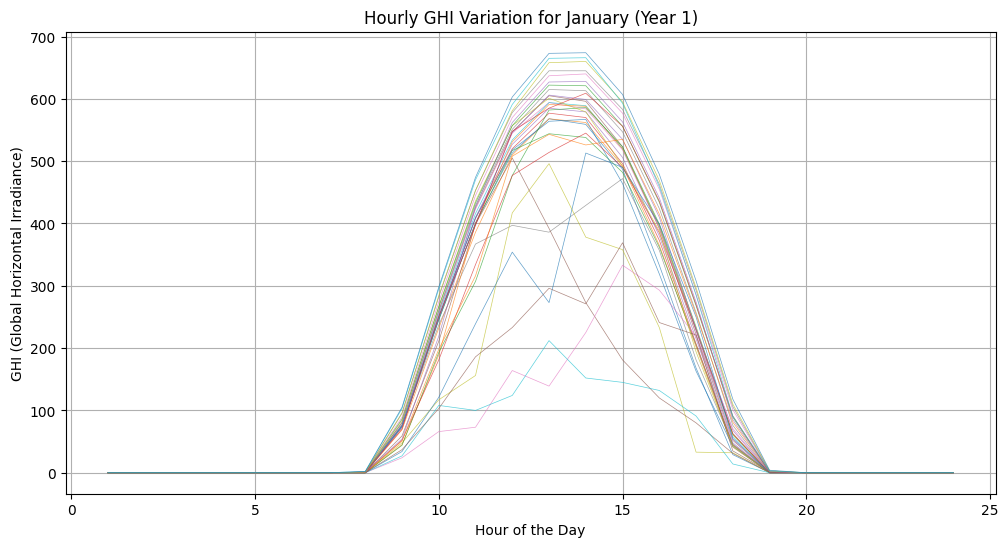

In [ ]:

df_filtered = df[(df["Year"] == 1) & (df["Month"] == 1)] #& (df["Day"] <= 10)]

plt.figure(figsize=(12, 6))

for day in df_filtered["Day"].unique():
    subset = df_filtered[df_filtered["Day"] == day]
    plt.plot(subset["Hour"], subset["Site-1 GHI"], alpha=0.7, linestyle="-", lw=0.5)

plt.xlabel("Hour of the Day")
plt.ylabel("GHI (Global Horizontal Irradiance)")
plt.title("Hourly GHI Variation for January (Year 1)")
plt.grid(True)
plt.show()



In [4]:
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index([], dtype='object')


In [5]:

df["Load"] = pd.to_numeric(df["Load"], errors='coerce')
df.head()


,Year,Month,Day,Hour,Load,Site-1 Temp,Site-2 Temp,Site-3 Temp,Site-4 Temp,Site-5 Temp,Site-1 GHI,Site-2 GHI,Site-3 GHI,Site-4 GHI,Site-5 GHI
0,1,1,1,1,1997,8.0,8.2,5.3,9.4,8.1,0,0,0,0,0
1,1,1,1,2,1921,8.3,8.6,5.2,8.6,7.1,0,0,0,0,0
2,1,1,1,3,1861,8.1,8.8,5.1,8.7,6.2,0,0,0,0,0
3,1,1,1,4,1833,7.6,8.1,4.3,8.5,6.0,0,0,0,0,0
4,1,1,1,5,1847,7.3,7.5,4.0,8.6,6.9,0,0,0,0,0


In [6]:
df_new = df.groupby(['Year', 'Month', 'Hour']).agg({
    'Load': 'mean',
    'Site-1 Temp': 'mean', 
    'Site-2 Temp': 'mean',
    'Site-3 Temp': 'mean',
    'Site-4 Temp': 'mean',
    'Site-5 Temp': 'mean',
    'Site-1 GHI': 'mean',
    'Site-2 GHI': 'mean', 
    'Site-3 GHI': 'mean',
    'Site-4 GHI': 'mean',
    'Site-5 GHI': 'mean'
}).reset_index()

df_new.head()


,Year,Month,Hour,Load,Site-1 Temp,Site-2 Temp,Site-3 Temp,Site-4 Temp,Site-5 Temp,Site-1 GHI,Site-2 GHI,Site-3 GHI,Site-4 GHI,Site-5 GHI
0,1,1,1,1936.741935,9.741935,10.564516,8.841935,10.541935,9.493548,0.0,0.0,0.0,0.0,0.0
1,1,1,2,1871.354839,9.493548,10.219355,8.545161,10.193548,9.309677,0.0,0.0,0.0,0.0,0.0
2,1,1,3,1827.806452,9.274194,9.861290,8.309677,10.267742,9.287097,0.0,0.0,0.0,0.0,0.0
3,1,1,4,1823.967742,9.083871,9.625806,8.022581,10.087097,9.054839,0.0,0.0,0.0,0.0,0.0
4,1,1,5,1886.516129,9.629032,9.561290,8.522581,10.503226,9.532258,0.0,0.0,0.0,0.0,0.0


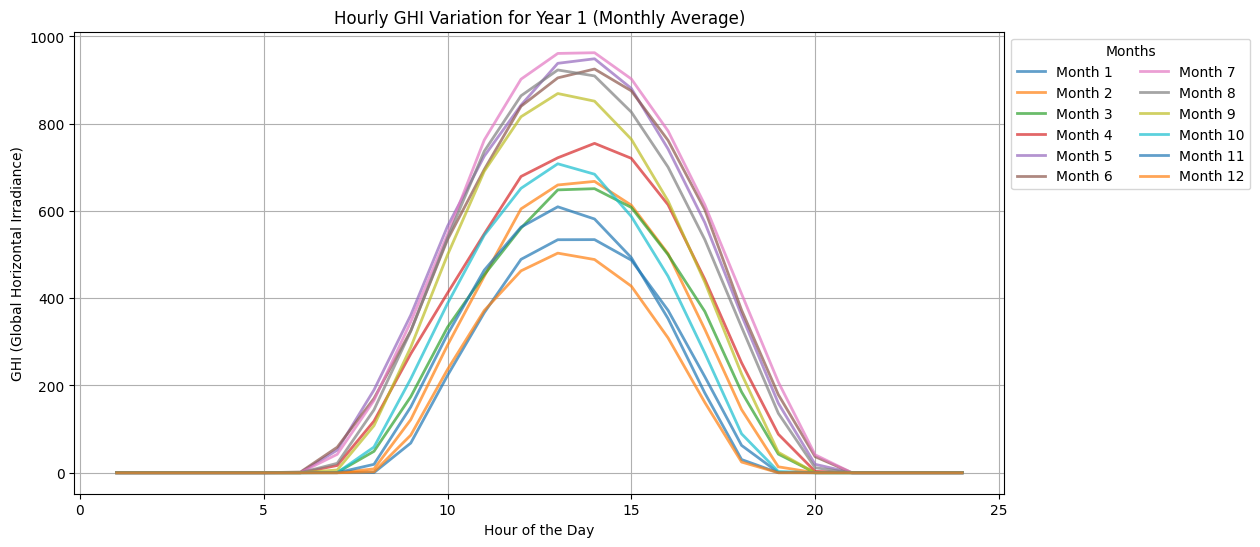

In [ ]:
df_filtered = df_new[(df_new["Year"] == 1)]

plt.figure(figsize=(12, 6))

for month in df_filtered["Month"].unique():
    subset = df_filtered[df_filtered["Month"] == month]
    plt.plot(subset["Hour"], subset["Site-1 GHI"], alpha=0.7, linestyle="-", lw=2, label=f"Month {month}")

plt.xlabel("Hour of the Day")
plt.ylabel("GHI (Global Horizontal Irradiance)")
plt.title("Hourly GHI Variation for Year 1 (Monthly Average)")
plt.legend(title="Months", loc="upper left", bbox_to_anchor=(1, 1), ncol=2)
plt.grid(True)
plt.show()

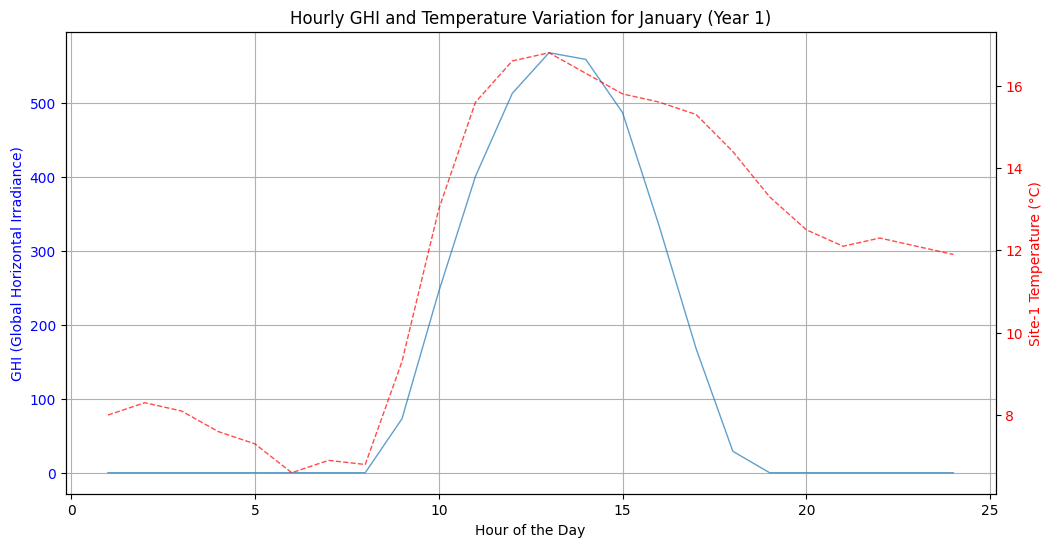

In [ ]:
df_filtered = df[(df["Year"] == 1) & (df["Month"] == 1) & (df["Day"] == 1)]

fig, ax1 = plt.subplots(figsize=(12, 6))

for day in df_filtered["Day"].unique():
    subset = df_filtered[df_filtered["Day"] == day]
    ax1.plot(subset["Hour"], subset["Site-1 GHI"], alpha=0.7, linestyle="-", lw=1, label=f"GHI - Day {day}")

ax1.set_xlabel("Hour of the Day")
ax1.set_ylabel("GHI (Global Horizontal Irradiance)", color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title("Hourly GHI and Temperature Variation for January (Year 1)")
ax1.grid(True)

ax2 = ax1.twinx()
for day in df_filtered["Day"].unique():
    subset = df_filtered[df_filtered["Day"] == day]
    ax2.plot(subset["Hour"], subset["Site-1 Temp"], alpha=0.7, linestyle="--", lw=1, color='r', label=f"Temp - Day {day}")

ax2.set_ylabel("Site-1 Temperature (°C)", color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.show()


In [16]:
df_new['Quarter'] = pd.cut(df_new['Month'], bins=[0, 3, 6, 9, 12], labels=['Q1', 'Q2', 'Q3', 'Q4'])

df_quarterly = df_new.groupby(['Year', 'Quarter', 'Hour'], observed=False).agg({
    'Load': 'mean',
    'Site-1 Temp': 'mean', 
    'Site-2 Temp': 'mean',
    'Site-3 Temp': 'mean',
    'Site-4 Temp': 'mean',
    'Site-5 Temp': 'mean',
    'Site-1 GHI': 'mean',
    'Site-2 GHI': 'mean', 
    'Site-3 GHI': 'mean',
    'Site-4 GHI': 'mean',
    'Site-5 GHI': 'mean'
}).reset_index()

df_quarterly.head()


,Year,Quarter,Hour,Load,Site-1 Temp,Site-2 Temp,Site-3 Temp,Site-4 Temp,Site-5 Temp,Site-1 GHI,Site-2 GHI,Site-3 GHI,Site-4 GHI,Site-5 GHI
0,1,Q1,1,1865.503152,10.828402,11.488988,9.537041,11.456989,10.236930,0.0,0.0,0.0,0.0,0.0
1,1,Q1,2,1804.793474,10.511457,11.126585,9.197961,11.157731,9.972080,0.0,0.0,0.0,0.0,0.0
2,1,Q1,3,1771.203189,10.255803,10.761995,8.997738,10.983315,9.835929,0.0,0.0,0.0,0.0,0.0
3,1,Q1,4,1777.336300,10.052206,10.458213,8.741194,10.847608,9.650797,0.0,0.0,0.0,0.0,0.0
4,1,Q1,5,1850.769373,10.447720,10.455098,8.769151,11.071746,9.953838,0.0,0.0,0.0,0.0,0.0


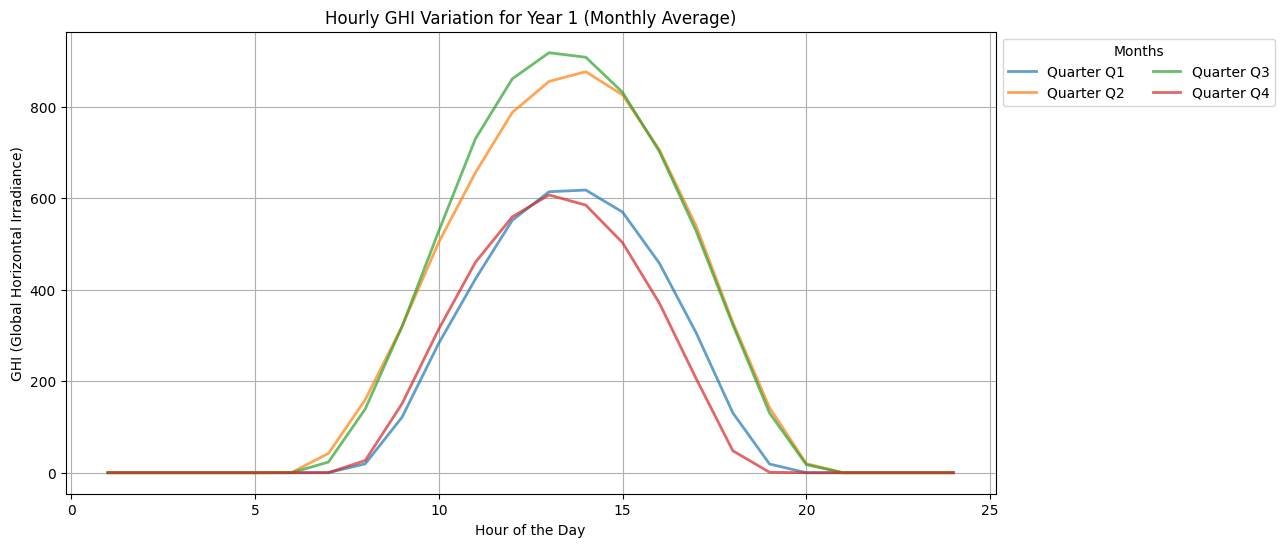

In [14]:
df_filtered = df_quarterly[(df_quarterly["Year"] == 1)]

plt.figure(figsize=(12, 6))

for quarter in df_filtered["Quarter"].unique():
    subset = df_filtered[df_filtered["Quarter"] == quarter]
    plt.plot(subset["Hour"], subset["Site-1 GHI"], alpha=0.7, linestyle="-", lw=2, label=f"Quarter {quarter}")

plt.xlabel("Hour of the Day")
plt.ylabel("GHI (Global Horizontal Irradiance)")
plt.title("Hourly GHI Variation for Year 1 (Monthly Average)")
plt.legend(title="Months", loc="upper left", bbox_to_anchor=(1, 1), ncol=2)
plt.grid(True)
plt.show()